In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [21]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [23]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [24]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [25]:
df['EstimatedSalary'] = (df['EstimatedSalary'] - df['EstimatedSalary'].min())/(df['EstimatedSalary'].max() - df['EstimatedSalary'].min())
df.drop(['User ID','Gender'],inplace=True,axis=1)
df

,Age,EstimatedSalary,Purchased
0,19,0.029630,0
1,35,0.037037,0
2,26,0.207407,0
3,27,0.311111,0
4,19,0.451852,0
...,...,...,...
395,46,0.192593,1
396,51,0.059259,1
397,50,0.037037,1
398,36,0.133333,0


In [26]:
x=df.iloc[:,[0,1]].values
y=df.iloc[:,[2]].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
x_train.shape

(300, 2)

In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred1 = model.predict(x_train)
print(model.score(x_train,y_train))

0.8333333333333334


C:\Users\neils\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
y_pred = model.predict(x_test)
print(model.score(x_test, y_test))

0.91


In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

accuracy = (TN + TP)/(TN+FN+TP+FP)
error_rate = 1 - accuracy

precision = TP / (TP+FP)
recall = TP / (TP+FN)

print('Confusion matrix:\n', cm)
print('Accuracy:', accuracy)
print('Error rate:', error_rate)
print('Precision:', precision)
print('Recall:', recall)

f1_Score = (2*precision*recall)/(precision+ recall)
print("f1_score: ", f1_Score)

Confusion matrix:
 [[65  3]
 [ 6 26]]
Accuracy: 0.91
Error rate: 0.08999999999999997
Precision: 0.896551724137931
Recall: 0.8125
f1_score:  0.8524590163934426


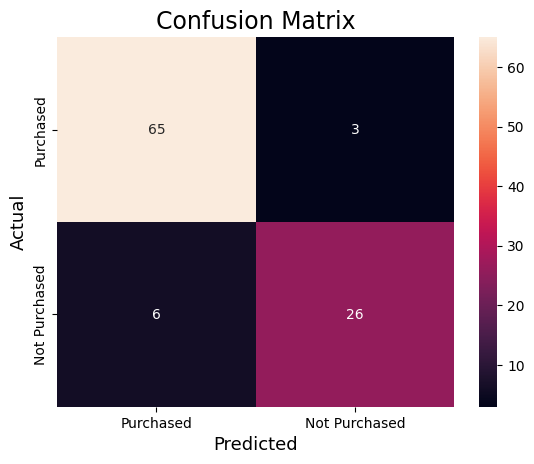

In [32]:
sns.heatmap(cm, annot=True, xticklabels=['Purchased','Not Purchased'], yticklabels=['Purchased','Not Purchased'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()